In [1]:
import numpy as np
import pandas as pd

In [2]:
from curve_fitting.exp_model import ExpModel

In [3]:
df = pd.read_excel("D:\Py\ExpCurvFit\Пример данных для ИВТ СО РАН.xlsx")

In [4]:
df.describe()

,Time(ms),EMF(mV),Rel. Error
count,107.000000,107.000000,107.000000
mean,265.058649,0.045965,1.032850
std,327.149393,0.067300,1.861508
min,2.645188,0.000002,0.007000
25%,7.716781,0.000017,0.022000
50%,72.814500,0.001349,0.161000
75%,500.412219,0.112300,1.241500
max,1030.509937,0.208000,10.009000


In [5]:
import matplotlib.pyplot as plt

In [6]:
t = df["Time(ms)"]
y = df["EMF(mV)"]
y_sigma = df["Rel. Error"]

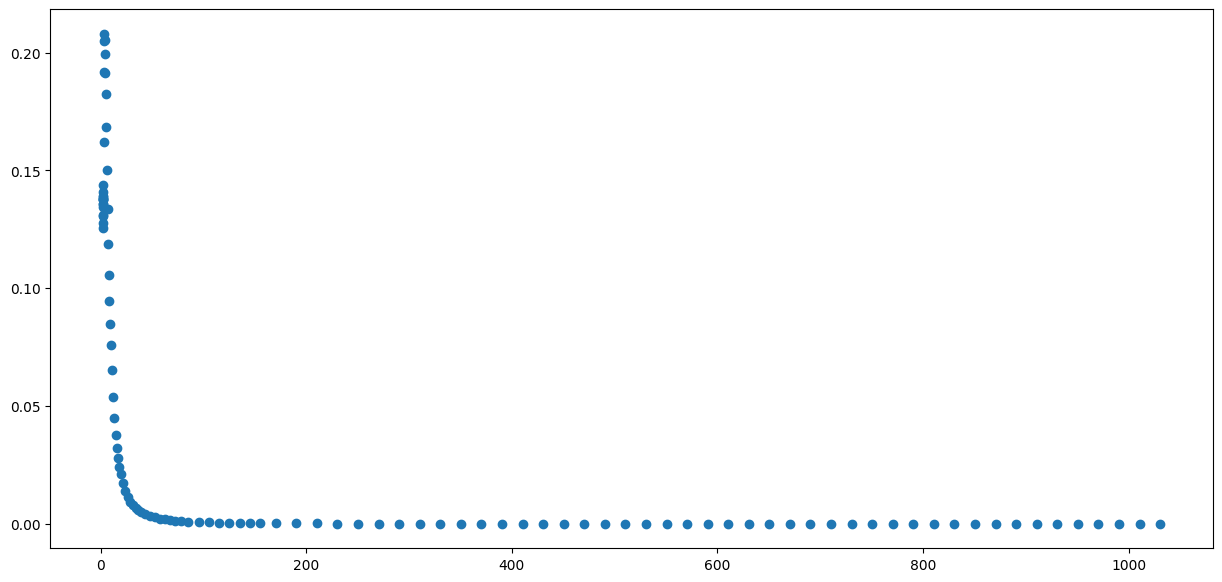

In [7]:
plt.figure(figsize=(15, 7))
plt.scatter(t, y)

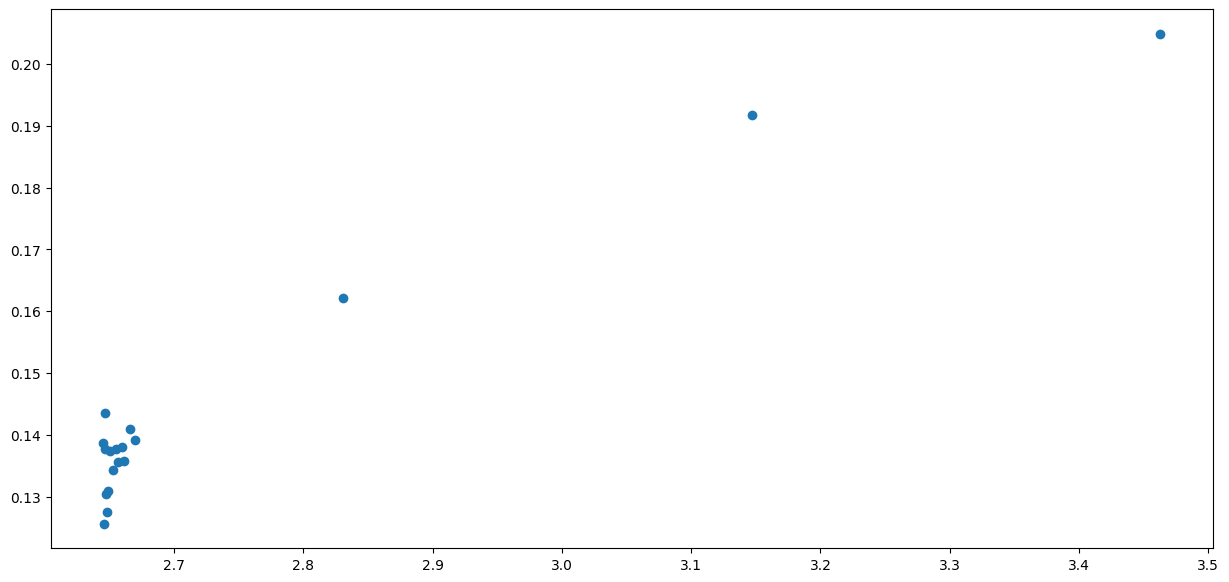

In [7]:
plt.figure(figsize=(15, 7))
plt.scatter(t[:18], y[:18])

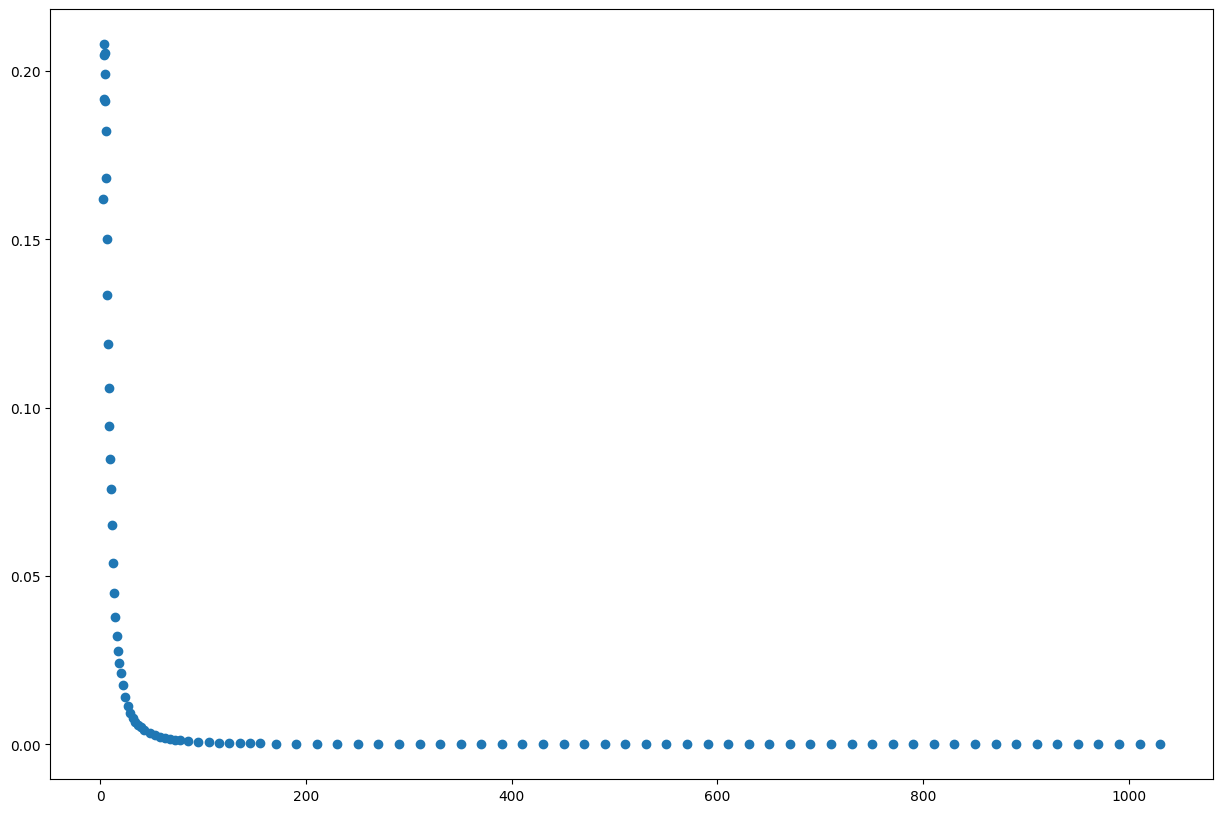

In [8]:
plt.figure(figsize=(15, 10))
plt.scatter(t[15:], y[15:])

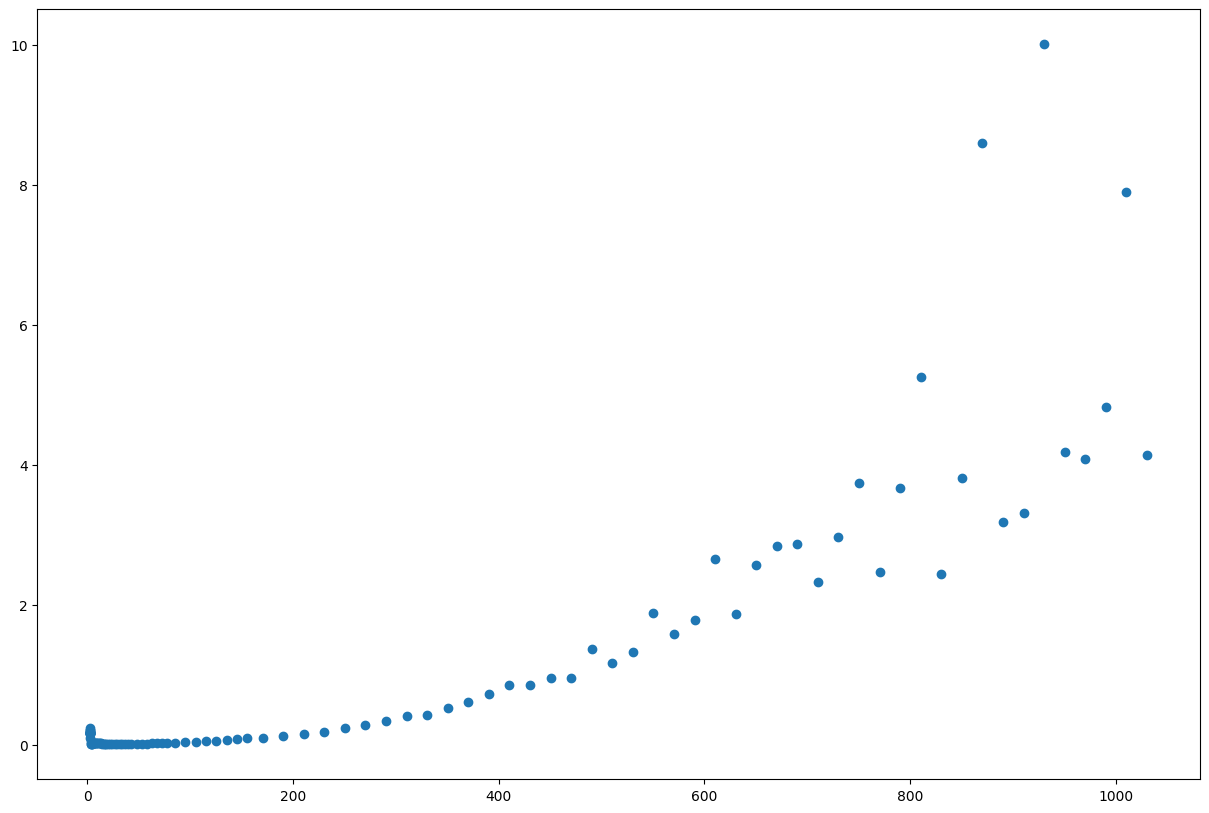

In [9]:
plt.figure(figsize=(15, 10))
plt.scatter(t, y_sigma)

In [39]:
y_mid = y
y_rad = y_sigma * 2
y_lb = y_mid - y_rad
y_ub = y_mid + y_rad
x_mid = t
x_rad = 0
x_lb = x_mid - x_rad
x_ub = x_mid + x_rad

model = ExpModel(quantity_exp= 8)
model.Fit(x_lb, x_ub, y_lb, y_ub, cost_a=0)

In [59]:
y_mid = y
y_rad = y_sigma * 2
y_rad[:16] = y_rad[:16] * 0.1
y_rad[:16] = y_rad[:16] * 0.1
y_lb = y_mid - y_rad
y_ub = y_mid + y_rad
x_mid = t
x_rad = 0
x_lb = x_mid - x_rad
x_ub = x_mid + x_rad

model = ExpModel(quantity_exp= 6)
model.Fit(x_lb, x_ub, y_lb, y_ub, cost_a=0)

In [56]:
model.tol_value, model.min_rad_y

(0.013999999999637941, 0.014000000000000012)

In [33]:
model.a_coef

array([0.2760662 , 0.29770382, 0.68802811])

In [24]:
model.b_coef

array([2.05074242, 0.9664522 , 2.64103113, 0.11377621])

In [34]:
y_pred = np.array([model.Predict(tt) for tt in t])

In [35]:
np.mean(y_pred - y)

0.021173234160237107

[-8.99336688  0.11609741 -6.27813952  0.5411994 ] [2.10945636 0.08533668 1.38716876 0.32395807] 0.010999999997640906


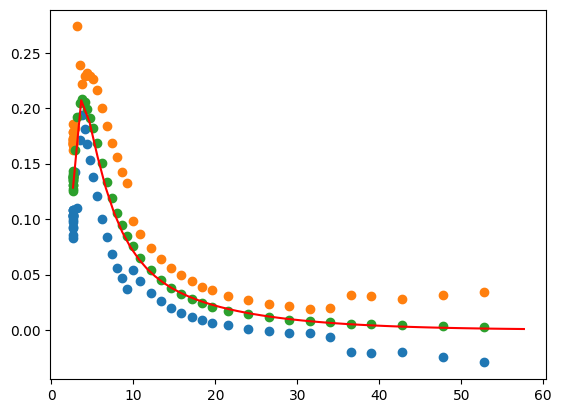

[-5.86905612  1.01586914  3.42022861  0.12992787 -2.00741578] [1.32578577 0.44702821 7.68120004 0.08882984 1.08734201] 0.010999999994217184


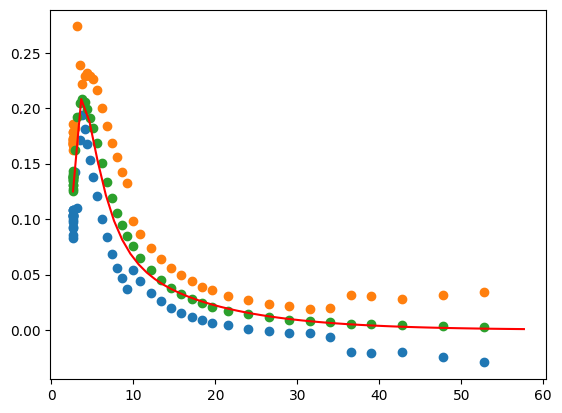

[-2.74183888 15.30264591  0.1193596  -1.90724758 13.74094833  1.20046112] [ 0.84722248 16.47330144  0.08614357  1.3477215   8.62520018  0.42316863] 0.010999999997083709


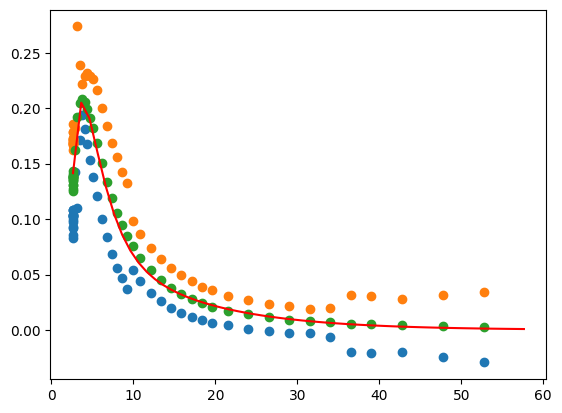

In [90]:
for i in [ 4, 5, 6]:
    y_mid = y
    y_rad = y_sigma * 2
    y_rad[:16] = y_rad[:16] * 0.1
    y_rad[30:45] = y_rad[30:45] * 0.5
    y_lb = y_mid - y_rad
    y_ub = y_mid + y_rad
    x_mid = t
    x_rad = 0
    x_lb = x_mid - x_rad
    x_ub = x_mid + x_rad

    model = ExpModel(quantity_exp= i)
    model.Fit(x_lb, x_ub, y_lb, y_ub, cost_a=0)
    print(model.a_coef, model.b_coef, model.tol_value)
    limit_lb = 0
    limit_ub = 50
    plt.scatter(t[limit_lb:limit_ub], y_lb[limit_lb:limit_ub])
    plt.scatter(t[limit_lb:limit_ub], y_ub[limit_lb:limit_ub])
    plt.scatter(t[limit_lb:limit_ub], y[limit_lb:limit_ub])
    x = np.arange(t[limit_lb], t[limit_ub], 1)
    y_pred_local = np.array([model.Predict(tt) for tt in x])
    plt.plot(x, y_pred_local, c = "r")
    plt.show()


In [102]:
y_mid = y
y_rad = y_sigma * 2
y_rad[:16] = y_rad[:16] * 0.1
y_rad[30:45] = y_rad[30:45] * 0.3
y_lb = y_mid - y_rad
y_ub = y_mid + y_rad
x_mid = t
x_rad = 0
x_lb = x_mid - x_rad
x_ub = x_mid + x_rad

model = ExpModel(quantity_exp= 6)
model.Fit(x_lb, x_ub, y_lb, y_ub, cost_a=0)
print(model.a_coef, model.b_coef, model.tol_value)


[-0.92317557  0.83371244 -2.23756519  0.02916049 -1.25783092  0.09966506] [1.25050757 0.35888416 0.88905703 0.23670803 1.48815302 0.08052445] 0.006599999999312638


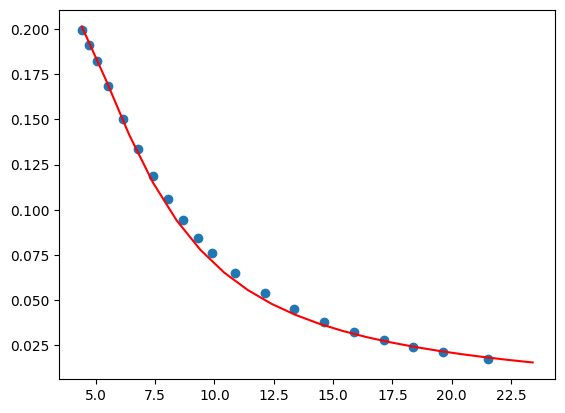

In [103]:
limit_lb = 20
limit_ub = 40
plt.scatter(t[limit_lb:limit_ub], y[limit_lb:limit_ub])
x = np.arange(t[limit_lb], t[limit_ub], 1)
y_pred_local = np.array([model.Predict(tt) for tt in x])
plt.plot(x, y_pred_local, c = "r")
plt.show()

In [66]:
dy = np.zeros((len(y_mid) - 1))

In [ ]:
y_mid

In [80]:
for i in range(len(dy)):
    dy[i] = (y_mid[i+1] - y_mid[i])/(t[i+1] - t[i])

In [81]:
t

0         2.645188
1         2.645688
2         2.646187
3         2.646688
4         2.647187
          ...     
102     950.495188
103     970.498875
104     990.502562
105    1010.506250
106    1030.509937
Name: Time(ms), Length: 107, dtype: float64

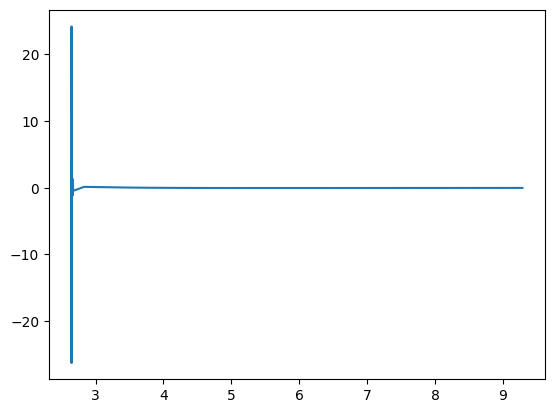

In [83]:
limit_lb = 0
limit_ub = 30
plt.plot(t[1 + limit_lb:limit_ub], dy[limit_lb:limit_ub-1])

In [16]:
y_mid = y
y_rad = 0
y_lb = y_mid - y_rad
y_ub = y_mid + y_rad
x_mid = t
x_rad = 0
x_lb = x_mid - x_rad
x_ub = x_mid + x_rad

model1 = ExpModel(quantity_exp= 4)
model1.Fit(x_lb, x_ub, y_lb, y_ub, cost_a= 0)

In [17]:
model1.tol_value, model1.a_coef, model1.b_coef

(-0.008894857239345078,
 array([ 1.35853774, -6.3610698 ,  0.30892115, -8.16930916]),
 array([0.6577527 , 1.16285617, 0.13697963, 2.1798646 ]))

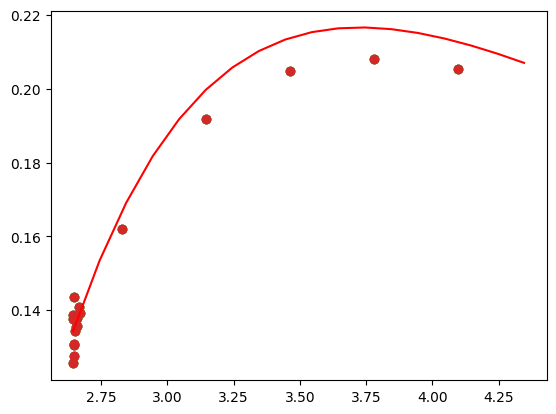

In [18]:
limit_lb = 0
limit_ub = 20


plt.scatter(x_lb[limit_lb:limit_ub], y_lb[limit_lb:limit_ub])
plt.scatter(x_lb[limit_lb:limit_ub], y_ub[limit_lb:limit_ub])
plt.scatter(x_ub[limit_lb:limit_ub], y_lb[limit_lb:limit_ub])
plt.scatter(x_ub[limit_lb:limit_ub], y_ub[limit_lb:limit_ub])
x = np.arange(t[limit_lb], t[limit_ub], 0.1)
y_pred_local = np.array([model1.Predict(tt) for tt in x])
plt.plot(x, y_pred_local, c = "r")

In [19]:
pip install cvxopt

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Py\ExpCurvFit\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [20]:
import intvalpy as ip
ip.precision.extendedPrecisionQ = False
import numpy as np


iplt = ip.IPlot(figsize=(15, 15))
fig, ax = iplt.subplots(nrows=2, ncols=2)

x = ip.Interval([[1, 1.2], [1.9, 2.7], [1.7, 1.95], [3.5, 3.5],
                 [4.5, 5.5], [6, 6], [6.5, 7.5], [7, 7.8]])
y = ip.Interval([[4, 4.3], [4.5, 5.3], [4.6, 4.8], [5.1, 6],
                 [6, 6.5], [7, 7], [6.7, 7.4], [6.8, 8]])

axindex = (1, 1)
ax[axindex].set_title('Interval scatterplot')
ax[axindex].title.set_size(15)
iplt.scatter(x, y, color='gray', alpha=0.7, s=10, axindex=axindex)

ImportError: DLL load failed while importing base: Не найден указанный модуль.